In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [ ]:
# read data
df = pd.read_csv('data99_churn_train.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(4696, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4696 non-null   object 
 1   gender            4696 non-null   object 
 2   SeniorCitizen     4696 non-null   int64  
 3   Partner           4696 non-null   object 
 4   Dependents        4696 non-null   object 
 5   tenure            4696 non-null   int64  
 6   PhoneService      4696 non-null   object 
 7   MultipleLines     4696 non-null   object 
 8   InternetService   4696 non-null   object 
 9   OnlineSecurity    4696 non-null   object 
 10  OnlineBackup      4696 non-null   object 
 11  DeviceProtection  4696 non-null   object 
 12  TechSupport       4696 non-null   object 
 13  StreamingTV       4696 non-null   object 
 14  StreamingMovies   4696 non-null   object 
 15  Contract          4696 non-null   object 
 16  PaperlessBilling  4696 non-null   object 


In [ ]:
print('# of variables with missing:', (df.isna().sum(axis=0)>0).sum() )
print('# of samples with missing:', (df.isna().sum(axis=1)>0).sum() )
print('# of total missing:',df.isna().sum().sum() )

# of variables with missing: 1
# of samples with missing: 4
# of total missing: 4


In [ ]:
df.isna().sum(axis=0)  # 각 변수에 대하여 결측치가 몇 개인지 확인

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        4
Churn               0
dtype: int64

In [ ]:
# 표본 제거를 통한 결측치 처리
data_clean = df.dropna(axis=0)
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(4692, 21)
# of total missing: 0


In [ ]:
data_clean.groupby('Churn').mean()

<ipython-input-63-75abe344531d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_clean.groupby('Churn').mean()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128704,37.904416,60.626888,2546.637522
Yes,0.241600,18.064800,73.937160,1532.011880


In [ ]:
data_clean.groupby('Churn').var()

<ipython-input-64-6d5130814fef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_clean.groupby('Churn').var()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.112172,572.185863,968.280309,5.382737e+06
Yes,0.183376,397.015013,624.906102,3.714302e+06


array([[<Axes: title={'center': 'tenure'}>]], dtype=object)

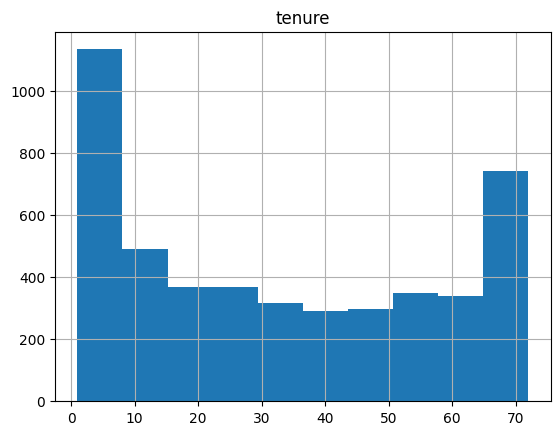

In [ ]:
data_clean.hist('tenure')

array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

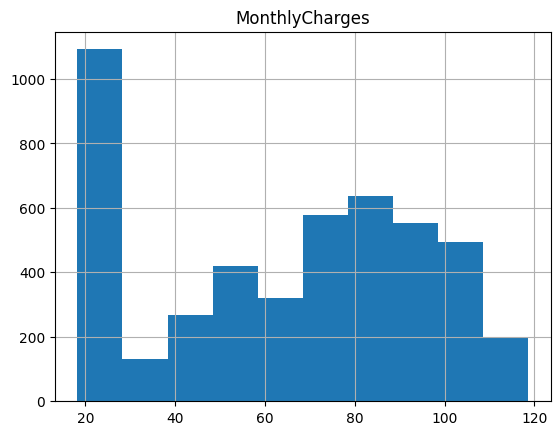

In [ ]:
data_clean.hist('MonthlyCharges')

array([[<Axes: title={'center': 'TotalCharges'}>]], dtype=object)

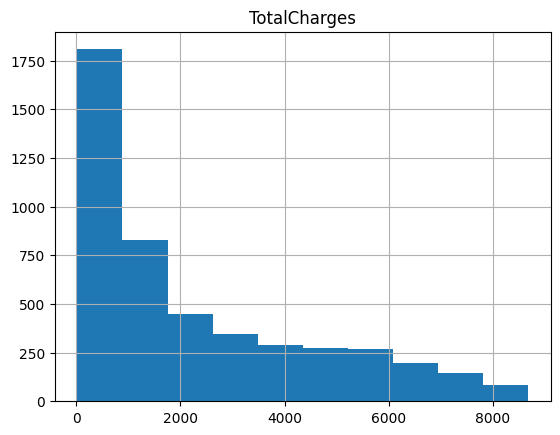

In [ ]:
data_clean.hist('TotalCharges')

In [ ]:
col_list = ['SeniorCitizen','customerID','gender','Partner', 'Dependents','PhoneService','MultipleLines','InternetService',
 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
 'PaperlessBilling','PaymentMethod','Churn']
for col in col_list:
  print(df[col].value_counts())

0    3951
1     745
Name: SeniorCitizen, dtype: int64
7590-VHVEG    1
9509-MPYOD    1
5176-OLSKT    1
7508-DQAKK    1
0016-QLJIS    1
             ..
9548-ZMVTX    1
2683-JXWQQ    1
7089-RKVSZ    1
0020-INWCK    1
8361-LTMKD    1
Name: customerID, Length: 4696, dtype: int64
Male      2393
Female    2303
Name: gender, dtype: int64
No     2403
Yes    2293
Name: Partner, dtype: int64
No     3291
Yes    1405
Name: Dependents, dtype: int64
Yes    4239
No      457
Name: PhoneService, dtype: int64
No                  2276
Yes                 1963
No phone service     457
Name: MultipleLines, dtype: int64
Fiber optic    2026
DSL            1630
No             1040
Name: InternetService, dtype: int64
No                     2292
Yes                    1364
No internet service    1040
Name: OnlineSecurity, dtype: int64
No                     2047
Yes                    1609
No internet service    1040
Name: OnlineBackup, dtype: int64
No                     2072
Yes                    1584
No inte

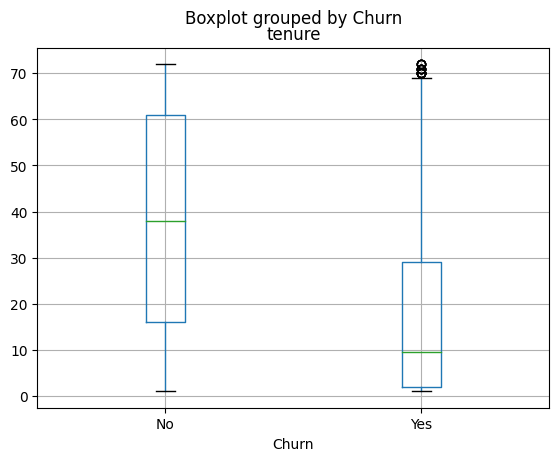

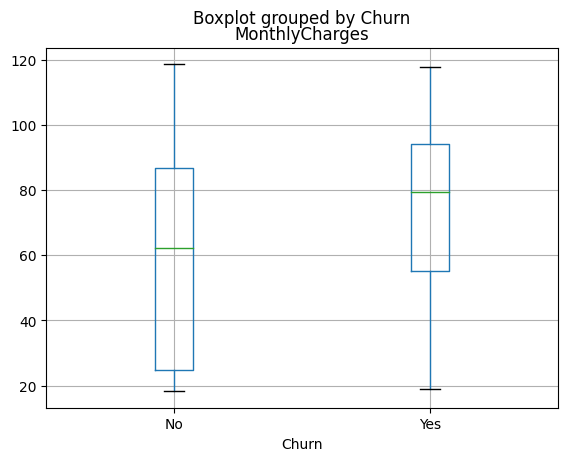

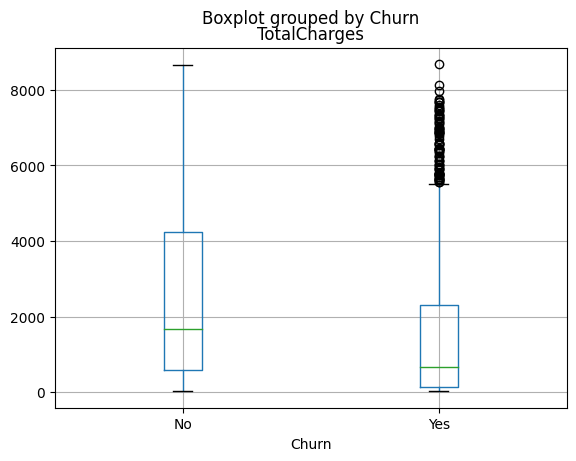

In [ ]:
# 범주별 박스 플롯
col_list_obj = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in col_list_obj:
  data_clean.boxplot(col,by='Churn')

In [ ]:
pd.crosstab(data_clean['SeniorCitizen'], data_clean['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,2999,948
1,443,302


In [ ]:
pd.crosstab(data_clean['gender'], data_clean['Churn'])

Churn,No,Yes
gender,,
Female,1679,621
Male,1763,629


In [ ]:
pd.crosstab(data_clean['Partner'], data_clean['Churn'])

Churn,No,Yes
Partner,,
No,1611,792
Yes,1831,458


In [ ]:
pd.crosstab(data_clean['Dependents'], data_clean['Churn'])

Churn,No,Yes
Dependents,,
No,2271,1020
Yes,1171,230


In [ ]:
pd.crosstab(data_clean['PhoneService'], data_clean['Churn'])

Churn,No,Yes
PhoneService,,
No,348,109
Yes,3094,1141


In [ ]:
pd.crosstab(data_clean['MultipleLines'], data_clean['Churn'])

Churn,No,Yes
MultipleLines,,
No,1696,578
No phone service,348,109
Yes,1398,563


In [ ]:
pd.crosstab(data_clean['InternetService'], data_clean['Churn'])

Churn,No,Yes
InternetService,,
DSL,1315,313
Fiber optic,1170,856
No,957,81


In [ ]:
pd.crosstab(data_clean['OnlineSecurity'], data_clean['Churn'])

Churn,No,Yes
OnlineSecurity,,
No,1327,964
No internet service,957,81
Yes,1158,205


In [ ]:
pd.crosstab(data_clean['OnlineBackup'], data_clean['Churn'])

Churn,No,Yes
OnlineBackup,,
No,1222,825
No internet service,957,81
Yes,1263,344


In [ ]:
pd.crosstab(data_clean['DeviceProtection'], data_clean['Churn'])

Churn,No,Yes
DeviceProtection,,
No,1258,814
No internet service,957,81
Yes,1227,355


In [ ]:
pd.crosstab(data_clean['TechSupport'], data_clean['Churn'])

Churn,No,Yes
TechSupport,,
No,1323,961
No internet service,957,81
Yes,1162,208


In [ ]:
pd.crosstab(data_clean['StreamingTV'], data_clean['Churn'])

Churn,No,Yes
StreamingTV,,
No,1276,632
No internet service,957,81
Yes,1209,537


In [ ]:
pd.crosstab(data_clean['StreamingMovies'], data_clean['Churn'])

Churn,No,Yes
StreamingMovies,,
No,1245,639
No internet service,957,81
Yes,1240,530


In [ ]:
pd.crosstab(data_clean['Contract'], data_clean['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,1456,1103
One year,884,106
Two year,1102,41


In [ ]:
pd.crosstab(data_clean['PaperlessBilling'], data_clean['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,1612,312
Yes,1830,938


In [ ]:
pd.crosstab(data_clean['PaymentMethod'], data_clean['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),880,172
Credit card (automatic),840,159
Electronic check,860,697
Mailed check,862,222


In [ ]:
Y = df['Churn']
X = df.iloc[:,1:-1]
out = pd.DataFrame({"Var":X.columns})
slist = np.zeros(out.shape[0])
plist = np.zeros(out.shape[0])
for i in range(out.shape[0]):
    y = Y
    x = X.iloc[:,i]
    if (x.dtype=='O') and (y.dtype=='O'):  # Object type
        r = scipy.stats.chi2_contingency( pd.crosstab(x,y) )
        s = r[0]
        p = r[1]
    else:
        if (x.dtype!='O') and (y.dtype=='O'):
            x, y = y, x
        # now x is categorical, y is numeric
        n = x.unique()
        ylist = []
        for j in range(len(n)):
            ylist.append(y[x==n[j]])
        if len(n)==2:
            r = scipy.stats.ttest_ind(*ylist)
            s = r.statistic
            p = r.pvalue
        else:
            r = scipy.stats.f_oneway(*ylist)
            s = r.statistic
            p = r.pvalue
    slist[i] = s
    plist[i] = p
out['stat'] = slist
out['pvalue'] = plist

In [ ]:
out.sort_values(by ='pvalue')

,Var,stat,pvalue
14,Contract,796.132802,1.324216e-173
4,tenure,26.133433,1.137690e-140
8,OnlineSecurity,562.334279,7.774326e-123
11,TechSupport,559.575582,3.088206e-122
7,InternetService,488.141373,1.003339e-106
9,OnlineBackup,407.636934,3.039236e-89
16,PaymentMethod,399.384725,3.009041e-86
10,DeviceProtection,373.345598,8.492457e-82
13,StreamingMovies,249.861887,5.535804e-55
12,StreamingTV,245.180956,5.749523e-54
